# Ako porovnávať modely? 

In [1]:
import pandas as pd 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay

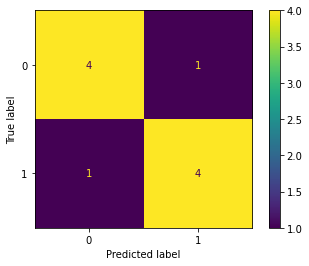

In [2]:
pred=    [1,1,1,1,1,0,0,0,0,0]
reality= [1,0,1,1,1,1,0,0,0,0]


cm=confusion_matrix(reality, pred)
disp=ConfusionMatrixDisplay(cm)
disp.plot()

## Vyhodnocovanie predikcie

<img src="assets/confusion_matrix.png" width="500" height="500">
<img src="assets/accuracy.png" width="500" height="500">
<img src="assets/precision.png" width="500" height="500">
<img src="assets/recall.png" width="500" height="500">
<img src="assets/f1_score.png" width="500" height="500">
<img src="assets/precision_recall_tradeoff.png" width="500" height="500">

### POZOR!
F1 je len harmonický priemer Precision a recall. Problemy: 
- Preferuje mensie hodnoty pozri menovatel (0x hocico je 0)</br>
- Dáva rovnakú váhu precision a recall !!!! môže byť nebezpečné

In [3]:
pred=    [1,1,1,1,1,0,0,0,0,0]
reality= [1,0,1,1,1,1,0,0,0,0]

print(classification_report(reality, pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.80      0.80      0.80         5

    accuracy                           0.80        10
   macro avg       0.80      0.80      0.80        10
weighted avg       0.80      0.80      0.80        10



# Problém: Čo keď predikujem viac tried?
Napríklad chcem predikovať či text na vstupe je písaný po anglicky po česky alebo po rusky?

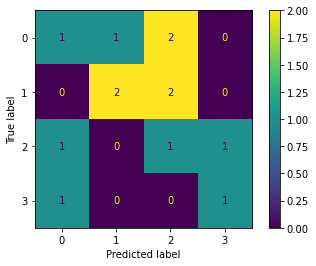

In [4]:
predictions=[1,2,0,1,2,2,3,0,1,2,3,2,0]
truth=      [1,0,0,0,2,1,2,3,1,1,3,0,2]

cm=confusion_matrix(truth, predictions)
disp=ConfusionMatrixDisplay(cm)
disp.plot()

In [5]:
print(classification_report(truth,predictions))

              precision    recall  f1-score   support

           0       0.33      0.25      0.29         4
           1       0.67      0.50      0.57         4
           2       0.20      0.33      0.25         3
           3       0.50      0.50      0.50         2

    accuracy                           0.38        13
   macro avg       0.42      0.40      0.40        13
weighted avg       0.43      0.38      0.40        13



Macro je len obycajny priemer

In [6]:
print(f1_score(truth,predictions, average='macro'))
print(precision_score(truth,predictions, average="macro"))
print(recall_score(truth,predictions, average="macro"))

0.4017857142857143
0.425
0.3958333333333333


Weighted je len vážený priemer

In [7]:
print(f1_score(truth,predictions, average='weighted'))
print(precision_score(truth,predictions, average="weighted"))
print(recall_score(truth,predictions, average="weighted"))

0.3983516483516484
0.43076923076923074
0.38461538461538464


In [8]:
(4*0.29+4*0.57+3*0.25+2*0.50)/13 # vysledok vyssie pracuje s viac desatinnymi cislami

0.39923076923076917

Alternativa F1 micro, ktora vyuziva vzorec z vrchu

In [9]:
TP=5 #1+2+1+1
FP_plus_FN= 8 #1+2+0+0+2+0+1+0+1+1+0+0
TP/(TP+FP_plus_FN)

0.38461538461538464

Ked sa nad tym zamyslite potom sa micro precision rovna micro recall a micro f1 score !!!!

In [10]:
print(f1_score(truth,predictions, average='micro'))
print(precision_score(truth,predictions, average="micro"))
print(recall_score(truth,predictions, average="micro"))

0.38461538461538464
0.38461538461538464
0.38461538461538464
